# Introduction

The goal is to train convolutional neural network which can recognize handwritten numbers (MNIST dataset) so this is just a basic multi classification problem.

# Exploratory data preview

In [1]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import matplotlib.pyplot as plt # plots
from keras.utils.np_utils import to_categorical # One-hot encoding
from keras.preprocessing.image import ImageDataGenerator # Data augmentation
from sklearn.model_selection import train_test_split # Split training data into training and validation sets


Using TensorFlow backend.


In [2]:
# Load the dataset
train = pd.read_csv("../input/train.csv")

In [3]:
# Preview the data structure
print(train.shape)
print(train.info())
train.head()

(42000, 785)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB
None


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Load the test data
test = pd.read_csv("../input/test.csv")
print(test.info())
test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB
None


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


- The data set consists of 784 pixels (28x28px) and label information which tells us the correct number in the image
- There's 42000 images (rows) in the data set
- Test data set has 28 000 images

In [5]:
# Separate the predictors (aka pixel values) from the targets
# Convert the type to float so we can preserve the precision when normalizing the values
X_train = train.drop(['label'],axis=1).astype('float32')
y_train = train['label'].astype('float32')
X_test = test.values.astype('float32')

## Data visualization

(42000, 28, 28)


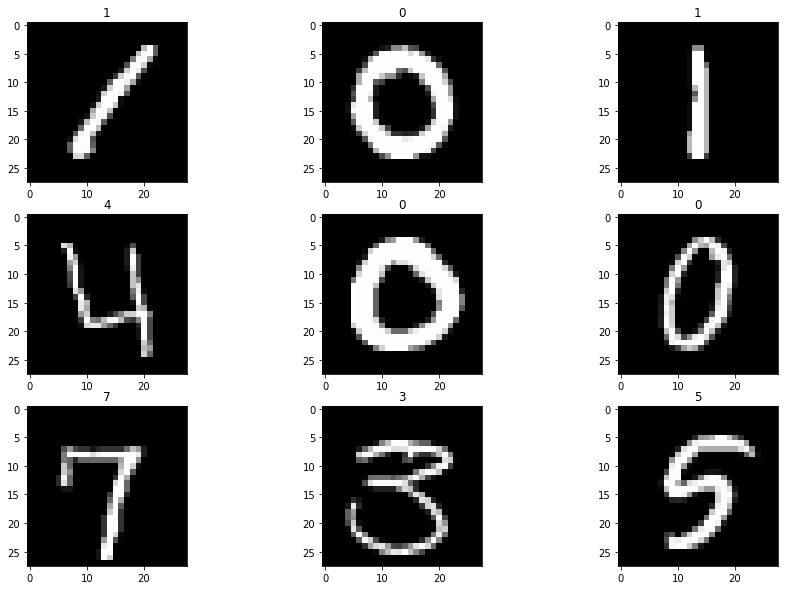

In [6]:
images = X_train.values.reshape(X_train.shape[0], 28, 28)
print(images.shape)

def display_image_data(img, index):
    plt.subplot(3, 3, index + 1)
    plt.imshow(img, cmap=plt.get_cmap('gray'))
    plt.title(y_train[index].astype('int32'))

plt.figure(figsize=(15,10))

for index, image in enumerate(images[0:9]):
    display_image_data(image, index)

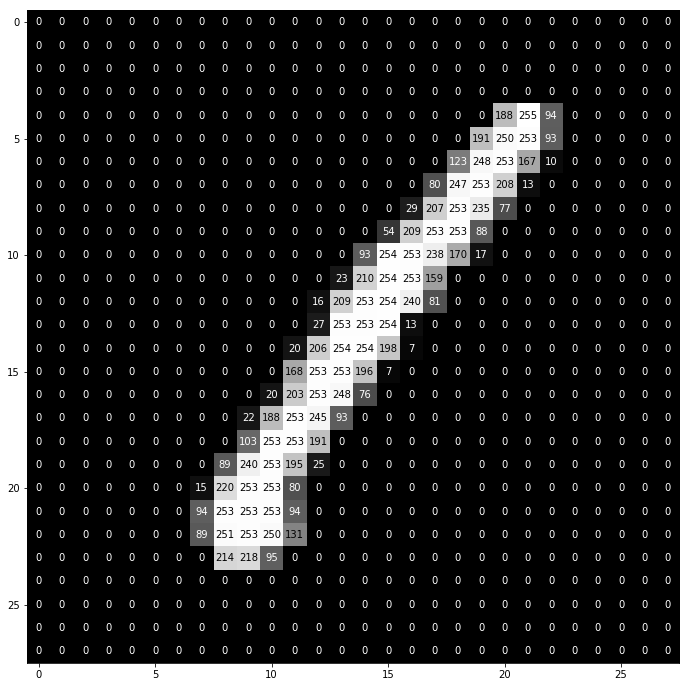

In [7]:
def render_pixel_values(image, plot):
    plot.imshow(image, cmap='gray')
    width, height = image.shape
    threshold = image.max() / 2
    
    # Loop through all the pixel values
    for x in range(width):
        for y in range(height):
            pixel_value = str(round(image[x][y], 2).astype('int32'))
            
            # If background is rendered black, render the text white and vice versa
            text_color = 'white' if image[x][y] < threshold else 'black'
            plot.annotate(pixel_value,
                          xy=(y,x),
                          horizontalalignment='center',
                          verticalalignment='center',
                          color=text_color)

fig = plt.figure(figsize = (12,12)) 
subplot = fig.add_subplot(1, 1, 1)

# Show the first image with the details
render_pixel_values(images[0], subplot)

In [8]:
# Add the dimension for the color channel (grey)
X_train = X_train.values.reshape(X_train.shape[0], 28, 28, 1)
print(X_train.shape)

X_test = X_test.reshape(X_test.shape[0], 28, 28,1)
print(X_test.shape)

(42000, 28, 28, 1)
(28000, 28, 28, 1)


# Data preprocessing

In [9]:
# Normalize the values
def normalize(m):
    return m / 255

X_train = normalize(X_train)
X_test = normalize(X_test)

In [10]:
# One-hot encode the labels
print('Labels')
print(y_train[:5])
y_train = to_categorical(y_train, 10)
print('Encoded labels')
print(y_train[:5])

Labels
0    1.0
1    0.0
2    1.0
3    4.0
4    0.0
Name: label, dtype: float32
Encoded labels
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


# Model training

In [11]:
# Build the model 
from keras.models import Sequential
from keras.optimizers import Adam, RMSprop
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, Dropout # Modeling
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from keras.layers.normalization import BatchNormalization

# Save the weights which produce the best validation accuracy
checkpoint = ModelCheckpoint(filepath='mnist.model.best.hdf5', 
                             verbose=1,
                             save_best_only=True,
                             monitor='val_acc')
def build_model():
    model = Sequential([
        Convolution2D(16, (3,3), activation='relu', input_shape=(28, 28, 1)),
        BatchNormalization(),
        
        Convolution2D(16, (3,3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(),
        Dropout(0.25),
        
        Convolution2D(32, (3,3), activation='relu'),
        # BatchNormalization(),
        Convolution2D(32, (3,3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(),
        Dropout(0.25),
        
        Flatten(),
        Dense(256, activation='relu'),
        BatchNormalization(),
        Dropout(0.25),
        Dense(10, activation='softmax')
    ])
    
    model.compile(optimizer=Adam(),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

model = build_model()


In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 16)        64        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 16)        2320      
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 16)        64        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 32)        4640      
__________

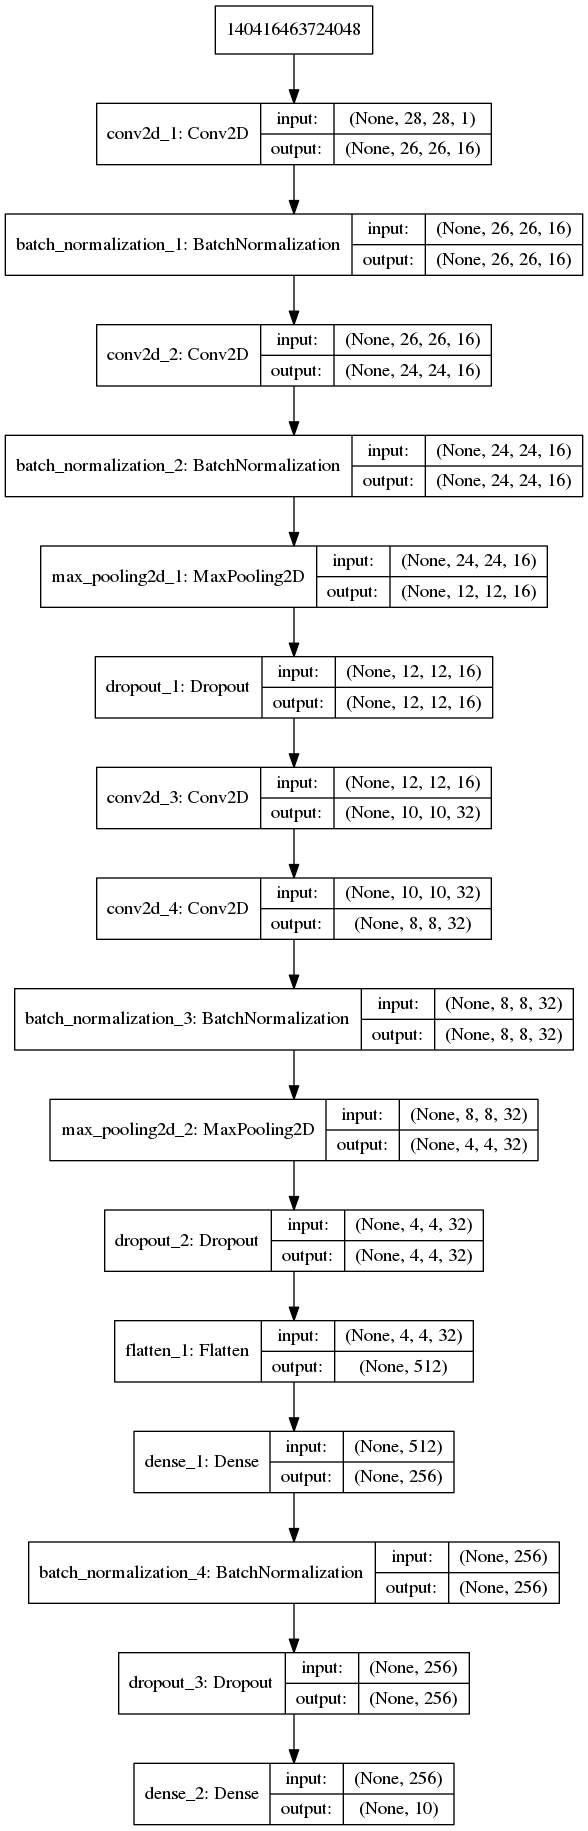

In [13]:
from keras.utils import plot_model
from IPython.display import Image

plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)
Image("model.png")

In [14]:
X_train, X_val, y_train, y_val = train_test_split(X_train,
                                                  y_train,
                                                  test_size=0.1,
                                                  random_state=42)

In [15]:
# Reduce the learning rate when the current value cannot minimize the cost function anymore...
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

### Data augmentation

- Let's use Keras ImageDataGenerator to expand the current training set

In [16]:

# Create augemented data with Keras ImageDataGenerator
image_generator = ImageDataGenerator(featurewise_center=False, # set input mean to 0 over the dataset
                                     samplewise_center=False,  # set each sample mean to 0
                                     featurewise_std_normalization=False,  # divide inputs by std of the dataset
                                     samplewise_std_normalization=False,  # divide each input by its std
                                     zca_whitening=False,  # apply ZCA whitening
                                     rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
                                     zoom_range = 0.1, # Randomly zoom image 
                                     width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
                                     height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
                                     horizontal_flip=False,  # randomly flip images
                                     vertical_flip=False)  # randomly flip images)



- **batch_size** determines the number of samples in each mini batch
    - **batch_size** = training samples => accurate gradient descent but slow to iterate
    - **batch_size** = 1 => Stochastic gradient, fast to iterate, a lot of jumping when finding the local minima of the cost function 
- Larger batch size will produce more precise gradient
- With more precise gradient we jump around a bit less when finding local minima
- Too large batch size
    - May cause memory issues
    - Get you stuck in a local minima because there's not enough jumping

In [17]:
# 
batch_size = 96

epochs = 60

# steps_per_epoch = the number of batch iterations before a training epoch is considered finished
# We want to use every sample so divide training set with batch size
# Total samples = epochs * steps * batchsize
steps_per_epoch = X_train.shape[0] / batch_size

batches = image_generator.flow(X_train, y_train, batch_size=batch_size)

In [18]:
# Train the actual network
history = model.fit_generator(generator=batches,
                              steps_per_epoch=steps_per_epoch,
                              epochs=epochs,
                              validation_data=(X_val, y_val),
                              callbacks=[checkpoint, learning_rate_reduction])

Epoch 1/60
394/393 [==============================] - 17s 43ms/step - loss: 0.4924 - acc: 0.8442 - val_loss: 0.0836 - val_acc: 0.9729

Epoch 00001: val_acc improved from -inf to 0.97286, saving model to mnist.model.best.hdf5
Epoch 2/60
394/393 [==============================] - 14s 35ms/step - loss: 0.1575 - acc: 0.9518 - val_loss: 0.0432 - val_acc: 0.9862

Epoch 00002: val_acc improved from 0.97286 to 0.98619, saving model to mnist.model.best.hdf5
Epoch 3/60
394/393 [==============================] - 14s 36ms/step - loss: 0.1173 - acc: 0.9633 - val_loss: 0.0294 - val_acc: 0.9890

Epoch 00003: val_acc improved from 0.98619 to 0.98905, saving model to mnist.model.best.hdf5
Epoch 4/60
394/393 [==============================] - 14s 35ms/step - loss: 0.0929 - acc: 0.9706 - val_loss: 0.0242 - val_acc: 0.9926

Epoch 00004: val_acc improved from 0.98905 to 0.99262, saving model to mnist.model.best.hdf5
Epoch 5/60
394/393 [==============================] - 14s 36ms/step - loss: 0.0817 - acc: 0

## Model evaluation

General rules of fitting
- Underfitting => Validation error high, training error high
- Overfitting => Validation error high, training error low
- Good fit => Validation error low, a bit higher than the training error


In [19]:
# Load the best weights
model.load_weights('mnist.model.best.hdf5')

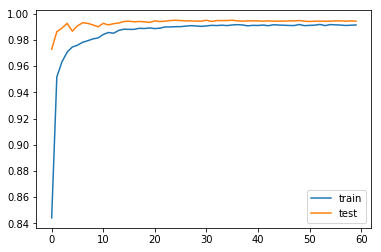

In [20]:
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='test')
plt.legend()
plt.show()

In [21]:
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, test_acc = model.evaluate(X_val, y_val, verbose=0)
print('Train accuracy: %.3f, Test accuracy: %.3f' % (train_acc, test_acc))

Train accuracy: 0.997, Test accuracy: 0.995


- Accuracy is generally not preferred way to measure classifier performance (though the given dataset labels are quite evenly distributed)
- Better way to evaluate the performance is to take a look at confusion matrix

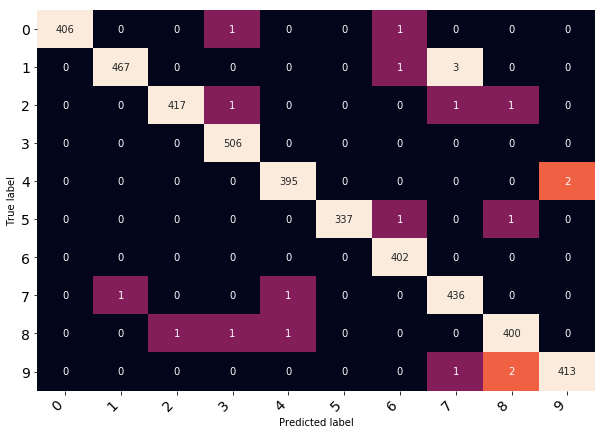

In [22]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    cm_dataframe = pd.DataFrame(confusion_matrix,
                         index=class_names,
                         columns=class_names)
    
    fig = plt.figure(figsize=figsize)
    
    heatmap = sns.heatmap(cm_dataframe,
                          annot=True,
                          fmt="d",
                          cbar=False,
                          vmin=0.0,
                          vmax=3.0)
    
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Y_pred = model.predict(X_val)

# Take the index of the highest probability ( = predicted class)
Y_pred_classes = np.argmax(Y_pred, axis = 1)

# The true labels of the images
y_true = np.argmax(y_val, axis = 1)

confusion_mtx = confusion_matrix(y_true, Y_pred_classes) 
print_confusion_matrix(confusion_mtx, range(10))

- The diagonal cells contain the correct predictions, the other cells contain missclassified instances
- There are some incorrectly classified samples here but no significant missclassification patterns cannot be seen in the matrix

In [23]:
errors = (Y_pred_classes - y_true != 0)

# The predicted class which were incorrect
Y_pred_classes_errors = Y_pred_classes[errors]

# The incorrect predictions (array of probability vectors)
Y_pred_errors = Y_pred[errors]

# The correct labels of the incorrect predictions
Y_true_errors = y_true[errors]


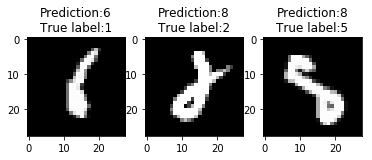

In [24]:
# Probabilities of the wrong predicted numbers
Y_pred_errors_prob = np.max(Y_pred_errors,axis = 1)

# Predicted probabilities of the true values in the error set
true_prob_errors = [Y_pred_errors[i][y_i] for i, y_i in enumerate(Y_true_errors)]

# Get the three most incorrect predictions
most_incorrect_preds = np.argsort(Y_pred_errors_prob - true_prob_errors)[-3:]

def display_error_predictions(errors_index,img_errors,pred_errors, obs_errors):
    for col in range(3):
        error = errors_index[col]
        plt.subplot(1, 3, col + 1)
        plt.imshow((img_errors[error]).reshape((28,28)), cmap=plt.get_cmap('gray'))
        plt.title("Prediction:{}\nTrue label:{}".format(pred_errors[error],obs_errors[error]))

display_error_predictions(most_incorrect_preds, X_val[errors], Y_pred_classes_errors, Y_true_errors)

- The most errornous predictions are made for quite obscure samples
- Admittedly even human (or at least I) might have hard time figuring out what these numbers are supposed to be

## Final prediction submission

In [25]:
predictions = model.predict_classes(X_test, verbose=2)

In [26]:
sub = pd.read_csv('../input/sample_submission.csv')
sub['Label'] = predictions
sub.to_csv('submission.csv',index=False)